# ADApocalypse present : TITLE

## Project Initialisation

### Importation of libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from collections import Counter
import matplotlib.ticker as mticker
from tqdm import tqdm # to visualize progression
import json

import ast


### Constants

In [2]:
DATA_FOLDER_PATH = './MovieSummaries/'
CLUSTER_JSON_PATH =  'src/data/clusters.json'

### Filtering and transformation of several columns

We noticed that the columns languages and genres of the movie.metadata.csv were very broad and included a large number of different propositions, such as more than 20 different Indian dialects. In order to perform a complete analysis without getting lost in interpretation we decided to cluster them. Moreover, some countries have been wrongly labeled or are ancient territories, which we clusted for equivalent reasons.

In [10]:
try:
    with open(CLUSTER_JSON_PATH, 'r') as file:
        data = json.load(file)
    json_languages = {lang for category in data['Languages'].values() for lang in category}
    json_genres = {lang  for category in data['Genres'].values() for lang in category}
    json_countries = {lang  for category in data['Countries'].values() for lang in category}
    my_languages = ['English Language', 'Hindi Language', 'Spanish Language', 'French Language', 'Silent film', 'Italian Language', 'Japanese Language', 'German Language', 'Tamil Language', 'Malayalam Language', 'Standard Mandarin', 'Telugu language', 'Russian Language', 'Cantonese', 'Korean Language', 'Dutch Language', 'Swedish Language', 'Arabic Language', 'Standard Cantonese', 'Czech Language', 'Bengali Language', 'Danish Language', 'Portuguese Language', 'Polish Language', 'Urdu Language', 'Tagalog language', 'Kannada Language', 'Mandarin Chinese', 'Serbian language', 'Hebrew Language', 'Hungarian language', 'Thai Language', 'Persian Language', 'Norwegian Language', 'Turkish Language', 'Greek Language', 'Filipino language', 'Punjabi language', 'Finnish Language', 'Chinese language', 'Croatian language', 'Romanian Language', 'American English', 'Indonesian Language', 'Serbo-Croatian', 'Malay Language', 'Latin Language', 'Sinhala Language', 'Bulgarian Language', 'Oriya Language', 'Marathi Language', 'Vietnamese Language', 'Icelandic Language', 'Khmer language', 'Yiddish Language', 'Ukrainian Language', 'Nepali Language', 'Albanian language', 'Slovak Language', 'Afrikaans Language', 'Estonian Language', 'Bhojpuri Language', 'Taiwanese', 'American Sign Language', 'Assamese Language', 'Swahili Language', 'Kurdish language', 'Armenian Language', 'Irish', 'Min Nan', 'Bosnian language', 'Georgian Language', 'Slovenian language', 'Catalan language', 'Gujarati Language', 'Hokkien', 'Zulu Language', 'Wolof Language', 'Pashto language', 'Burmese Language', 'Dari', 'France', 'Tibetan languages', 'Swiss German Language', 'Shanghainese', 'Farsi, Western Language', 'Xhosa Language', 'Azerbaijani language', 'Macedonian Language', 'Mongolian language', 'Navajo Language', 'Romani language', 'Welsh Language', 'Bambara language', 'Māori language', 'Amharic Language', 'Lithuanian language', 'Flemish language', 'Standard Tibetan', 'Quechua', 'Inuktitut', 'Scottish Gaelic language', 'Brazilian Portuguese', 'Gaelic', 'South African English', 'Rajasthani language', 'Uzbek language', 'Kinyarwanda language', 'Somali Language', 'Esperanto Language', 'Khmer, Central Language', 'Aramaic language', 'Chinese, Hakka Language', 'Egyptian Arabic', 'Plautdietsch Language', 'Sami languages', 'French Sign Language', '\ud801\udc16\ud801\udc32\ud801\udc49\ud801\udc4b\ud801\udc4c\ud801\udc32', 'Hindustani language', 'Sicilian Language', 'Sioux language', 'Luxembourgish language', 'Sanskrit Language', 'Galician Language', 'Indian English', 'Chechen Language', 'Saami, North Language', 'Sotho language', 'Hawaiian language', 'Maya, Yucatán Language', 'Napoletano-Calabrese Language', 'Belarusian language', 'Fula language', 'German', 'Australian English', 'Assyrian Neo-Aramaic Language', 'Klingon language', 'Thai, Northeastern Language', 'Cebuano language', 'Chinese, Jinyu Language', 'Chadian Arabic', 'Dzongkha Language', 'Tzotzil language', 'Hopi Language', 'Hariyani', 'Old English language', 'Corsican Language', 'Nahuatl languages', 'Teochew', 'Frisian, Western Language', 'Hausa Language', 'Tulu Language', 'Classical Arabic', 'Scanian Language', 'Fulfulde, Adamawa Language', 'Akan Language', 'Hmong language', 'Haryanvi Language', 'Crow Language', 'Mohawk Language', 'Yolngu Matha', 'Hiligaynon language', 'Ancient Greek', 'Italian', 'Egyptian, Ancient', 'Apache, Western Language', 'Hungary', 'Algonquin Language', 'Aboriginal Malay languages', 'Shanxi', 'Japan', 'Jamaican Creole English Language', 'Cree language', 'Mende Language', 'Hazaragi Language', 'Gumatj Language', 'Awadhi Language', 'Hinglish', 'Osetin Language', 'Maninka language', 'Aceh Language', 'Chhattisgarhi Language', 'Chewa language', 'Assyrian language', 'Hainanese', 'Papiamento language', 'Palawa kani', 'Sunda Language', 'Deutsch', 'Krio Language', 'Guanzhong Hua', 'Venetian Language', 'Cheyenne Language', 'Judeo-Georgian Language', 'Tamang language', 'Sumerian', 'Banyumasan language', 'Friulian Language', 'Kriolu', 'Picard Language', 'Maasai Language', 'Korean Sign Language', 'Southwestern Mandarin', 'Australian Aboriginal Pidgin English', 'Tok Pisin Language', 'Pawnee Language', 'Kuna language']
    my_languages_set = set(my_languages)
    my_genres = ['Drama', 'Comedy', 'Romance Film', 'Black-and-white', 'Action', 'Thriller', 'Short Film', 'World cinema', 'Crime Fiction', 'Indie', 'Documentary', 'Horror', 'Silent film', 'Adventure', 'Family Film', 'Action/Adventure', 'Comedy film', 'Musical', 'Animation', 'Romantic drama', 'Mystery', 'Science Fiction', 'Fantasy', 'Romantic comedy', 'War film', 'Japanese Movies', 'Western', 'Crime Thriller', 'Period piece', 'Comedy-drama', 'Film adaptation', 'Chinese Movies', 'Biography', 'Psychological thriller', 'Bollywood', 'Sports', 'Biographical film', 'LGBT', 'Music', 'Family Drama', 'Black comedy', 'Parody', 'Television movie', 'Martial Arts Film', "Children's/Family", 'Teen', 'Coming of age', 'History', 'Political drama', 'Slasher', 'Cult', 'Suspense', 'Culture & Society', 'Melodrama', 'Satire', 'Supernatural', 'Biopic [feature]', 'Film noir', 'Slapstick', 'Historical fiction', 'Crime Drama', 'Action Thrillers', "Children's", 'B-movie', 'Costume drama', 'Spy', 'Art film', 'Ensemble Film', 'Anime', 'Gangster Film', 'Docudrama', 'Political cinema', 'Detective', 'Creature Film', 'Buddy film', 'Gay Themed', 'Filipino Movies', 'Road movie', 'Detective fiction', 'Sex comedy', 'Social issues', 'Pornographic movie', 'Historical drama', 'Erotica', 'Crime Comedy', 'Superhero movie', 'Concert film', 'Screwball comedy', 'Gay', 'Disaster', 'Gay Interest', "Children's Fantasy", 'Epic', 'Zombie Film', 'Comedy of manners', 'Experimental film', 'Family-Oriented Adventure', 'Courtroom Drama', 'Political thriller', 'Horror Comedy', 'Musical comedy', 'Computer Animation', 'Fantasy Comedy', 'Adult', 'Fantasy Adventure', 'Domestic Comedy', 'Propaganda film', 'Erotic thriller', 'Comedy of Errors', 'Rockumentary', 'Musical Drama', 'Avant-garde', 'Marriage Drama', 'Monster movie', 'Animal Picture', 'Pre-Code', 'Natural horror films', 'Heist', 'Mockumentary', 'Stop motion', 'Action Comedy', 'Christian film', 'Surrealism', 'Erotic Drama', 'Childhood Drama', 'Adventure Comedy', 'Sci-Fi Horror', 'Spaghetti Western', 'Social problem film', 'Prison', 'Swashbuckler films', 'Sexploitation', 'Wuxia', 'Superhero', 'Doomsday film', 'Film', 'Animated cartoon', 'Slice of life story', 'Monster', 'Dance', 'Alien Film', 'Holiday Film', 'Chase Movie', 'Caper story', 'Blaxploitation', 'Americana', 'Costume Adventure', 'Historical Epic', 'Political satire', 'Combat Films', 'Tragedy', 'Feminist Film', 'Workplace Comedy', 'Dystopia', 'Christmas movie', 'Stand-up comedy', 'Absurdism', 'Comedy Thriller', 'Remake', 'New Hollywood', 'Time travel', 'Media Satire', 'Law & Crime', 'Whodunit', 'Hip hop movies', 'Film & Television History', 'Medical fiction', 'Jungle Film', 'Auto racing', 'Boxing', 'Gender Issues', 'Haunted House Film', 'Gothic Film', 'Religious Film', 'Gay pornography', 'Comedy Western', 'Romantic fantasy', 'Revisionist Western', 'Punk rock', 'Tamil cinema', 'Softcore Porn', 'Nature', 'Fairy tale', 'B-Western', 'Costume Horror', 'Addiction Drama', 'Tragicomedy', 'Neo-noir', 'Juvenile Delinquency Film', 'Gross out', 'Gross-out film', 'Escape Film', 'Airplanes and airports', 'Illnesses & Disabilities', 'Animated Musical', 'Stoner film', 'Travel', 'Interpersonal Relationships', 'Sword and sorcery', 'Glamorized Spy Film', 'Animals', 'Tollywood', 'Crime', 'Samurai cinema', 'Roadshow theatrical release', 'Sword and sorcery films', 'Anti-war', 'Anti-war film', 'Fan film', 'Educational', 'Hybrid Western', 'Inspirational Drama', 'Existentialism', 'Apocalyptic and post-apocalyptic fiction', 'Media Studies', 'Steampunk', 'Giallo', 'Environmental Science', 'Sci-Fi Adventure', 'Mythological Fantasy', 'Film à clef', 'Future noir', 'Pinku eiga', 'Extreme Sports', 'Heavenly Comedy', 'Splatter film', 'Master Criminal Films', 'Graphic & Applied Arts', 'Language & Literature', 'Comedy horror', 'Dogme 95', 'Sword and Sandal', 'Hagiography', 'Indian Western', 'Backstage Musical', 'Essay Film', 'Instrumental Music', 'Biker Film', 'British Empire Film', 'Exploitation', 'Heaven-Can-Wait Fantasies', 'Northern', 'Road-Horror', 'Beach Film', 'World History', "Children's Entertainment", 'Fantasy Drama', 'Movie serial', 'Epic Western', 'Outlaw biker film', 'Family & Personal Relationships', 'Albino bias', 'Women in prison films', 'Pornography', 'Bengali Cinema', 'Kitchen sink realism', 'News', 'Natural disaster', 'Cavalry Film', 'Buddy cop', 'Anthropology', 'Inventions & Innovations', 'Psycho-biddy', 'Health & Fitness', 'Ealing Comedies', 'Horse racing', 'Feature film', 'British New Wave', 'Anthology', 'Business', 'Space western', 'Mondo film', 'Malayalam Cinema', 'Prison film', 'Filipino', 'Cold War', 'Hardcore pornography', 'Baseball', 'Mumblecore', 'Archaeology', 'Foreign legion', 'Reboot', 'Czechoslovak New Wave', 'Journalism', 'Fictional film', 'Acid western', 'Early Black Cinema', 'Sponsored film', 'Jukebox musical', 'Education', 'Legal drama', 'Archives and records', 'Computers', 'Filmed Play', 'Historical Documentaries', 'Race movie', 'Movies About Gladiators', 'Science fiction Western', 'Alien invasion', 'Latino', 'Gulf War', 'Courtroom Comedy', 'Cyberpunk', 'Bloopers & Candid Camera', 'Parkour in popular culture', 'Clay animation', 'Demonic child', 'Finance & Investing', 'Kafkaesque', 'Operetta', 'Singing cowboy', 'Female buddy film', 'Coming-of-age film', 'Sci-Fi Thriller', 'School story', 'Outlaw', 'Sci Fi Pictures original films', 'Plague', 'Psychological horror', 'Roadshow/Carny', 'Film-Opera', 'Space opera', 'Libraries and librarians', "Children's Issues", 'Therimin music', 'Live action', 'Goat gland', 'Tokusatsu', 'Werewolf fiction', 'Bruceploitation', 'Humour', 'Point of view shot', 'Vampire movies', 'Supermarionation', 'Expressionism', 'Camp', 'Z movie', 'Nuclear warfare', 'Star vehicle', 'Prison escape', 'Revisionist Fairy Tale', 'The Netherlands in World War II', 'Ninja movie', 'Patriotic film', 'Period Horror', 'Beach Party film', 'Political Documetary', 'Conspiracy fiction', 'Private military company', 'Revenge', 'Linguistics', 'Statutory rape', 'Breakdance', 'War effort', 'Neorealism', 'New Queer Cinema', 'Chick flick', 'Buddy Picture', 'Romantic thriller', 'Comdedy', 'C-Movie', 'Silhouette animation', 'Homoeroticism']
    my_genres_set = set(my_genres)
    my_countries = ['United States of America', 'India', 'United Kingdom', 'France', 'Italy', 'Japan', 'Canada', 'Germany', 'Argentina', 'Hong Kong', 'Spain', 'Australia', 'South Korea', 'Mexico', 'Netherlands', 'Sweden', 'West Germany', 'China', 'Denmark', 'Soviet Union', 'Philippines', 'Poland', 'Czechoslovakia', 'Belgium', 'New Zealand', 'Norway', 'Russia', 'Hungary', 'German Democratic Republic', 'Yugoslavia', 'Brazil', 'Ireland', 'Switzerland', 'Austria', 'Finland', 'Czech Republic', 'Israel', 'Turkey', 'England', 'Iran', 'Thailand', 'South Africa', 'Greece', 'Pakistan', 'Taiwan', 'Portugal', 'Croatia', 'Egypt', 'Romania', 'Indonesia', 'Malaysia', 'Bulgaria', 'Sri Lanka', 'Singapore', 'Iceland', 'Cambodia', 'Luxembourg', 'Bangladesh', 'Weimar Republic', 'Chile', 'Serbia', 'Morocco', 'Cuba', 'Colombia', 'Scotland', 'Algeria', 'Nepal', 'Tunisia', 'Lebanon', 'Burkina Faso', 'Estonia', 'Bosnia and Herzegovina', 'Slovakia', 'Senegal', 'Slovenia', 'Venezuela', 'Puerto Rico', 'Vietnam', 'Albania', 'Ukraine', 'Korea', 'Azerbaijan', 'Peru', 'Nigeria', 'Burma', 'Nazi Germany', 'Democratic Republic of the Congo', 'Republic of Macedonia', 'Uruguay', 'Socialist Federal Republic of Yugoslavia', 'Serbia and Montenegro', 'Georgia', 'Mali', 'Iraq', 'Lithuania', 'Kenya', 'United Arab Emirates', 'Armenia', 'Kingdom of Great Britain', 'Cameroon', 'Bolivia', 'Afghanistan', 'Federal Republic of Yugoslavia', 'Georgian SSR', 'Jamaica', 'Ethiopia', 'Palestinian territories', 'Mandatory Palestine', 'Slovak Republic', 'Uzbek SSR', 'Wales', 'Zimbabwe', 'Panama', 'Uzbekistan', 'Costa Rica', 'Malta', 'Northern Ireland', 'Montenegro', 'Kingdom of Italy', 'Monaco', 'Cyprus', 'Mongolia', 'Congo', 'Ukrainian SSR', 'Guinea', 'Libya', 'Bahamas', 'Haiti', 'Kuwait', 'Bhutan', 'Aruba', 'Bahrain', 'Qatar', 'Zambia', 'Isle of Man', 'Soviet occupation zone', 'Jordan', 'Malayalam Language', 'Iraqi Kurdistan', 'Turkmenistan', 'Guinea-Bissau', 'Crime', 'Republic of China', 'Macau', 'Palestinian Territories', 'German Language', 'Ukranian SSR']
    my_countries_set = set(my_countries)
    missing_languages = my_languages_set - json_languages
    missing_genres = my_genres_set - json_genres
    missing_countries = my_countries_set - json_countries
    additional_languages = json_languages - my_languages_set
    additional_genres = json_genres - my_genres_set
    additional_countries = json_countries - my_countries_set
    
    if missing_languages:
        print("Languages missing from JSON:")
        print(missing_languages)
        print(f"Total missing languages: {len(missing_languages)}")
        print("\n")
    if missing_genres:
        print("Genres missing from JSON:")
        print(missing_genres)
        print(f"Total missing genres: {len(missing_genres)}")
        print("\n")
    if missing_countries:
        print("Countries missing from JSON:")
        print(missing_countries)
        print(f"Total missing countries: {len(missing_countries)}")
        print("\n")

    if additional_languages:
        print("Additional languages in JSON not in your list:")
        print(additional_languages)
        print("\n")
    if additional_genres:
        print("Additional genres in JSON not in your list:")
        print(additional_genres)
        print("\n")
    if additional_countries:
        print("Additional countries in JSON not in your list:")
        print(additional_countries)
        print("\n")
        
    all_languages = [lang for category in data['Languages'].values() for lang in category]
    duplicates_languages = set(lang for lang in all_languages if all_languages.count(lang) > 1)
    
    all_genres = [lang for category in data['Genres'].values() for lang in category]
    duplicates_genres = set(lang for lang in all_genres if all_genres.count(lang) > 1)
    
    all_countries = [lang for category in data['Countries'].values() for lang in category]
    duplicates_countries = set(lang for lang in all_countries if all_countries.count(lang) > 1)

    if duplicates_languages:
        print("Duplicate languages found in JSON:")
        print(duplicates_languages)
        print("\n")
    if duplicates_genres:
        print("Duplicate genres found in JSON:")
        print(duplicates_genres)
        print(f"Total duplicate genres: {len(duplicates_genres)}")
        print("\n")
    if duplicates_countries:
        print("Duplicate countries found in JSON:")
        print(duplicates_countries)
        print("\n")

except FileNotFoundError:
    print("File not found. Please make sure 'clusters.json' exists.")
except json.JSONDecodeError as e:
    print(f"JSON decoding error: {e}")


Languages missing from JSON:
{'\ud801\udc16\ud801\udc32\ud801\udc49\ud801\udc4b\ud801\udc4c\ud801\udc32'}
Total missing languages: 1


Genres missing from JSON:
{'Movie serial', 'Religious Film', 'Nature', 'Plague', 'Roadshow/Carny', 'Inventions & Innovations', 'Kafkaesque', 'Business', 'Star vehicle', 'Television movie', 'Camp', 'Christian film', 'Health & Fitness', 'Bruceploitation', 'Linguistics', 'Bloopers & Candid Camera', 'Coming-of-age film', 'Therimin music', 'Statutory rape', 'Pre-Code', 'Blaxploitation', 'Finance & Investing', 'Female buddy film', 'Mondo film', 'Film', 'Albino bias', 'Slice of life story'}
Total missing genres: 27


Countries missing from JSON:
{'Crime'}
Total missing countries: 1


Additional languages in JSON not in your list:
{'Taiwanese Language'}


Duplicate genres found in JSON:
{'Alien invasion', 'Historical Epic', 'Marriage Drama', 'Heist', 'Doomsday film', 'Psychological horror', 'Rockumentary', 'Domestic Comedy', 'Period piece', 'Docudrama', 'Romant

# 1. MOVIES

## 1.1 METADATA

### In order to perform a complete analysis, we intend to further add the columns 'director_name', 'director_gender' and 'budget' to the movies_metadata dataframe, thanks to the wikipedia_movie_id allowing us to access the library wikipedia_api

In [ ]:
movies_metadata = pd.read_csv(DATA_FOLDER_PATH+'movie.metadata.tsv', sep='\t', header=None, 
                 names=['wikipedia_movie_id', 'freebase_movie_id', 'movie_name', 'movie_release_date',
                        'movie_box_office_revenue', 'movie_runtime', 'movie_languages', 'movie_countries', 'movie_genres'])

print(movies_metadata.shape)
print(movies_metadata.shape[0])

In [276]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81741 entries, 0 to 81740
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   wikipedia_movie_id        81741 non-null  int64  
 1   freebase_movie_id         81741 non-null  object 
 2   movie_name                81741 non-null  object 
 3   movie_release_date        74839 non-null  object 
 4   movie_box_office_revenue  8401 non-null   float64
 5   movie_runtime             61291 non-null  float64
 6   movie_languages           81741 non-null  object 
 7   movie_countries           81741 non-null  object 
 8   movie_genres              81741 non-null  object 
 9   new_movie_languages       81741 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 6.2+ MB


In [90]:
movies_metadata.isnull().sum()

wikipedia_movie_id              0
freebase_movie_id               0
movie_name                      0
movie_release_date           6902
movie_box_office_revenue    73340
movie_runtime               20450
movie_languages                 0
movie_countries                 0
movie_genres                    0
dtype: int64

In [ ]:
print(f"There are {movies_metadata['wikipedia_movie_id'].nunique()} unique wikipedia_movie_id")
print(f"and there are {movies_metadata['freebase_movie_id'].nunique()} unique freebase_movie_id")
print(f"but there are {movies_metadata['movie_name'].nunique()} unique movie_name")
print(f"and there are {movies_metadata.shape[0]} rows in the dataset")


In [94]:
movies_metadata.duplicated().sum()

0

In [283]:
def extract_names_from_tuples(languages):
    lang_dict = ast.literal_eval(languages)
    return list(lang_dict.values())

In [317]:
movies_metadata['new_movie_languages'] = movies_metadata['movie_languages'].apply(extract_names_from_tuples)
movies_metadata['new_movie_countries'] = movies_metadata['movie_countries'].apply(extract_names_from_tuples)
movies_metadata['new_movie_genres'] = movies_metadata['movie_genres'].apply(extract_names_from_tuples)

In [318]:
movies_metadata['new_movie_languages'].head(10)

0                 [English Language]
1                 [English Language]
2               [Norwegian Language]
3                 [English Language]
4                  [German Language]
5    [Silent film, English Language]
6                 [English Language]
7                 [English Language]
8                 [Spanish Language]
9                 [English Language]
Name: new_movie_languages, dtype: object

Import the clusters.json file in order to have the languages, genres and countries dictionaries.

In [319]:
languages_mapping = data['Languages']
genres_mapping = data['Genres']
countries_mapping = data['Countries']

In [320]:
def map_language(mapping, lang):
    for generic, variants in mapping.items():
        if lang in variants:
            return generic
    return lang

In [407]:
movies_metadata['cleaned_movie_languages'] = movies_metadata['new_movie_languages'].apply(lambda x: list(dict.fromkeys([map_language(languages_mapping, lang) for lang in x]).keys()))
movies_metadata['cleaned_movie_genres'] = movies_metadata['new_movie_genres'].apply(lambda x: list(dict.fromkeys([map_language(genres_mapping, lang) for lang in x]).keys()))
movies_metadata['cleaned_movie_countries'] = movies_metadata['new_movie_countries'].apply(lambda x: list(dict.fromkeys([map_language(countries_mapping, lang) for lang in x]).keys()))

In [408]:
movies_metadata['cleaned_movie_genres'].head(10)

0    [Thriller, Science Fiction, Horror, Adventure,...
1                   [Horror, Drama, Crime and Mystery]
2                           [Crime and Mystery, Drama]
3                                           [Thriller]
4                                              [Drama]
5         [Other Genres, Cult and Independent, Comedy]
6    [Family's Films, Fantasy, Adventure, World Cin...
7      [Music and Dance, Comedy, Cult and Independent]
8                     [Music and Dance, Drama, Comedy]
9                                             [Horror]
Name: cleaned_movie_genres, dtype: object

In [409]:
movies_metadata['cleaned_movie_languages'].head(10)

0            [English]
1            [English]
2          [Norwegian]
3            [English]
4             [German]
5    [Silent, English]
6            [English]
7            [English]
8            [Spanish]
9            [English]
Name: cleaned_movie_languages, dtype: object

In [339]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81741 entries, 0 to 81740
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   wikipedia_movie_id        81741 non-null  int64  
 1   freebase_movie_id         81741 non-null  object 
 2   movie_name                81741 non-null  object 
 3   movie_release_date        74839 non-null  object 
 4   movie_box_office_revenue  8401 non-null   float64
 5   movie_runtime             61291 non-null  float64
 6   movie_languages           81741 non-null  object 
 7   movie_countries           81741 non-null  object 
 8   movie_genres              81741 non-null  object 
 9   new_movie_languages       81741 non-null  object 
 10  new_movie_countries       81741 non-null  object 
 11  new_movie_genres          81741 non-null  object 
 12  cleaned_movie_languages   81741 non-null  object 
 13  cleaned_movie_genres      81741 non-null  object 
 14  cleane

### 1.1.1 GENRES

In [397]:
all_genres = movies_metadata['cleaned_movie_genres'].copy()
all_genres = [genre for sublist in movies_metadata['cleaned_movie_genres'] for genre in sublist]
genre_counts = Counter(all_genres)

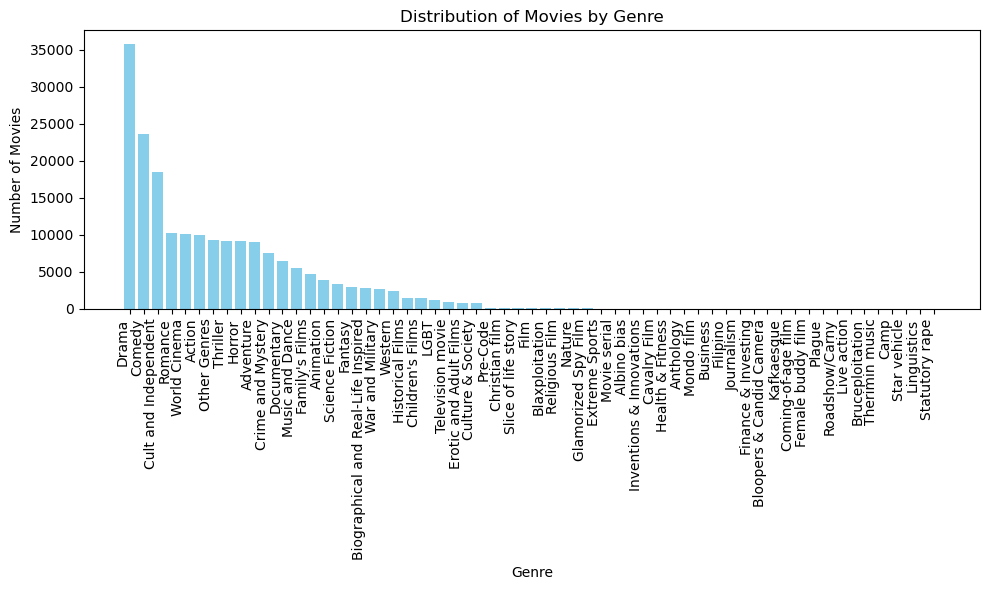

In [395]:
genre_df = pd.DataFrame(genre_counts.items(), columns=['Genre', 'Count'])

# Sort by the genre count
genre_df = genre_df.sort_values(by='Count', ascending=False)

# Plot the distribution of genres
plt.figure(figsize=(10, 6))
plt.bar(genre_df['Genre'], genre_df['Count'], color='skyblue')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies by Genre')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()

heatmap avec les genres les + représentés

### 1.1.2. LANGUAGES

In [410]:
all_languages = movies_metadata['cleaned_movie_languages'].copy()
all_languages = [genre for sublist in movies_metadata['cleaned_movie_languages'] for genre in sublist]
language_counts = Counter(all_languages)


In [420]:
# find the count for the luxembourgish language
language_counts['Luxembourgish']

6

/var/folders/pm/cnh4098x5cv02sy4zwlhygtc0000gn/T/ipykernel_3363/1854449719.py:13: UserWarning: Glyph 55297 (\ud801) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Adjust layout to prevent clipping
/var/folders/pm/cnh4098x5cv02sy4zwlhygtc0000gn/T/ipykernel_3363/1854449719.py:13: UserWarning: Glyph 56342 (\udc16) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Adjust layout to prevent clipping
/var/folders/pm/cnh4098x5cv02sy4zwlhygtc0000gn/T/ipykernel_3363/1854449719.py:13: UserWarning: Glyph 56370 (\udc32) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Adjust layout to prevent clipping
/var/folders/pm/cnh4098x5cv02sy4zwlhygtc0000gn/T/ipykernel_3363/1854449719.py:13: UserWarning: Glyph 56393 (\udc49) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Adjust layout to prevent clipping
/var/folders/pm/cnh4098x5cv02sy4zwlhygtc0000gn/T/ipykernel_3363/1854449719.py:13: UserWarning: Glyph 56395 (\udc4b) missing from font(s) DejaVu Sans.
  plt.tight_layout

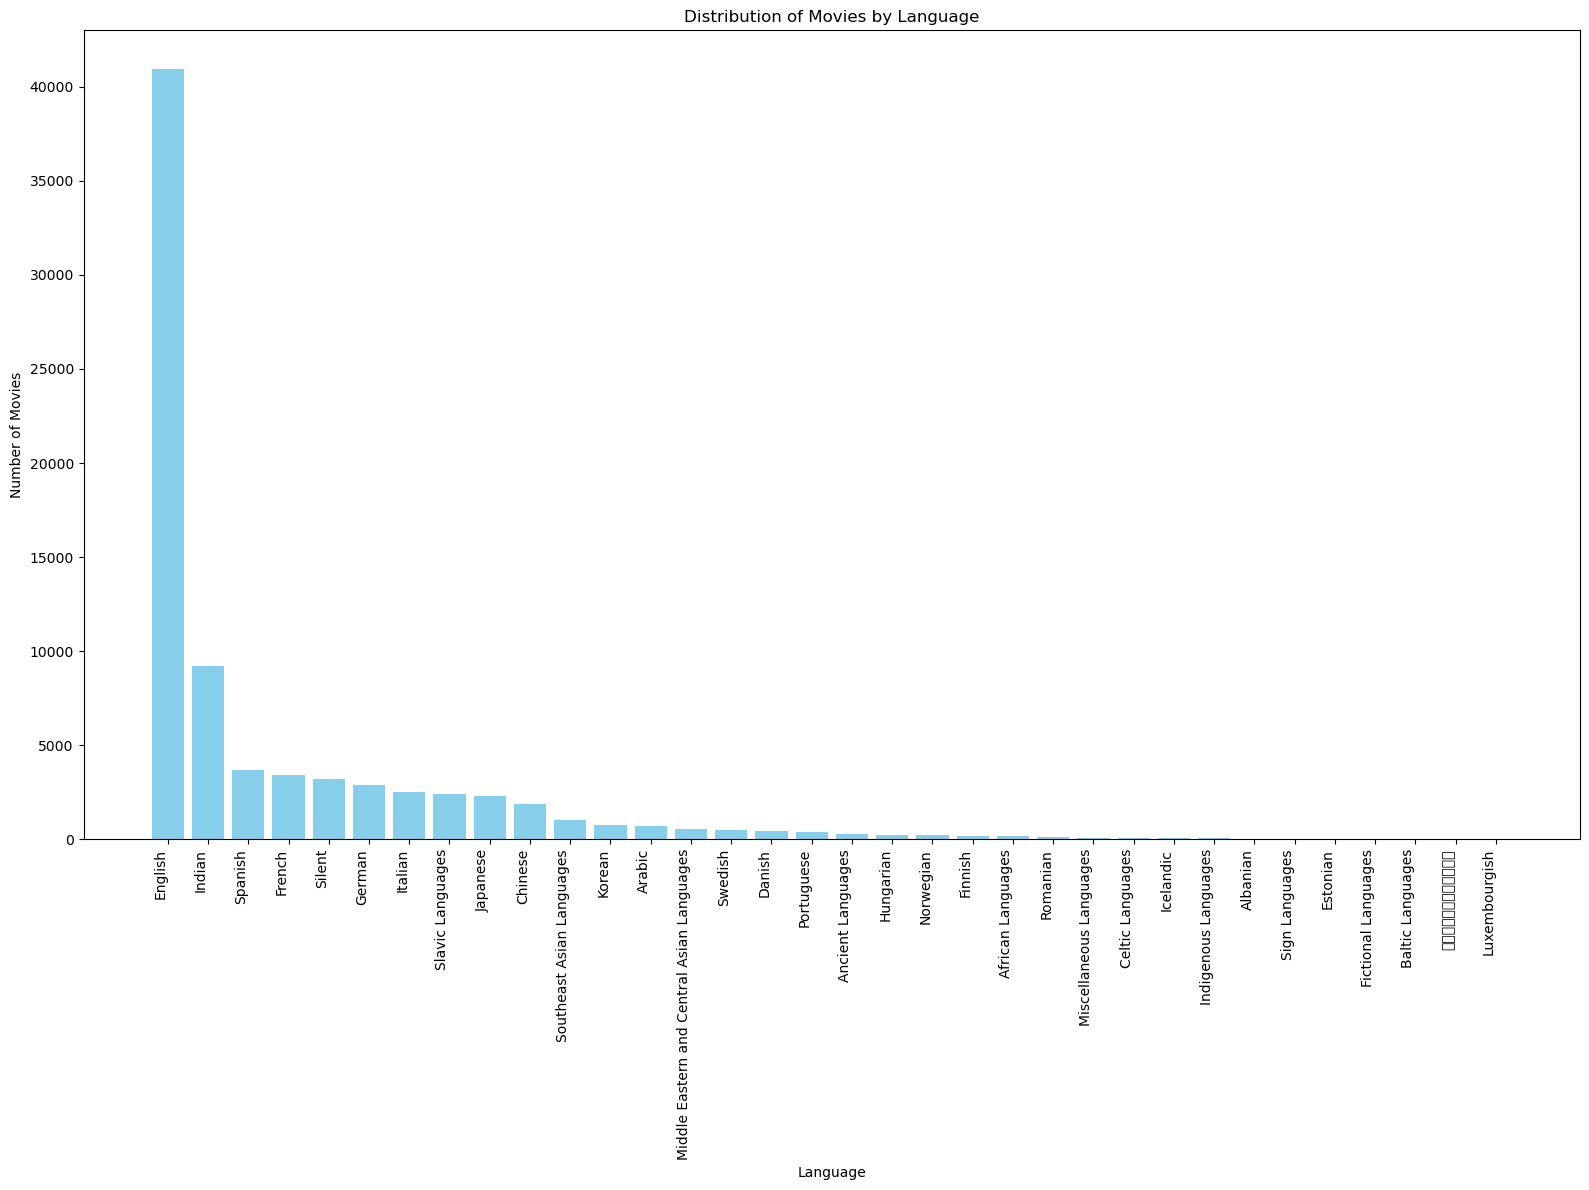

<Figure size 640x480 with 0 Axes>

In [415]:
language_df = pd.DataFrame(language_counts.items(), columns=['Language', 'Count'])

# Sort by the genre count
language_df = language_df.sort_values(by='Count', ascending=False)

# Plot the distribution of genres
plt.figure(figsize=(16, 12))
plt.bar(language_df['Language'], language_df['Count'], color='skyblue')
plt.xlabel('Language')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies by Language')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()
plt.tight_layout()  # Adjust layout to prevent clipping

# appliquer un log scale ?

films avec plusieurs langues ?

### 1.1.3. COUNTRIES

In [421]:
all_countries = movies_metadata['cleaned_movie_countries'].copy()
all_countries = [genre for sublist in movies_metadata['cleaned_movie_countries'] for genre in sublist]
countries_counts = Counter(all_countries)


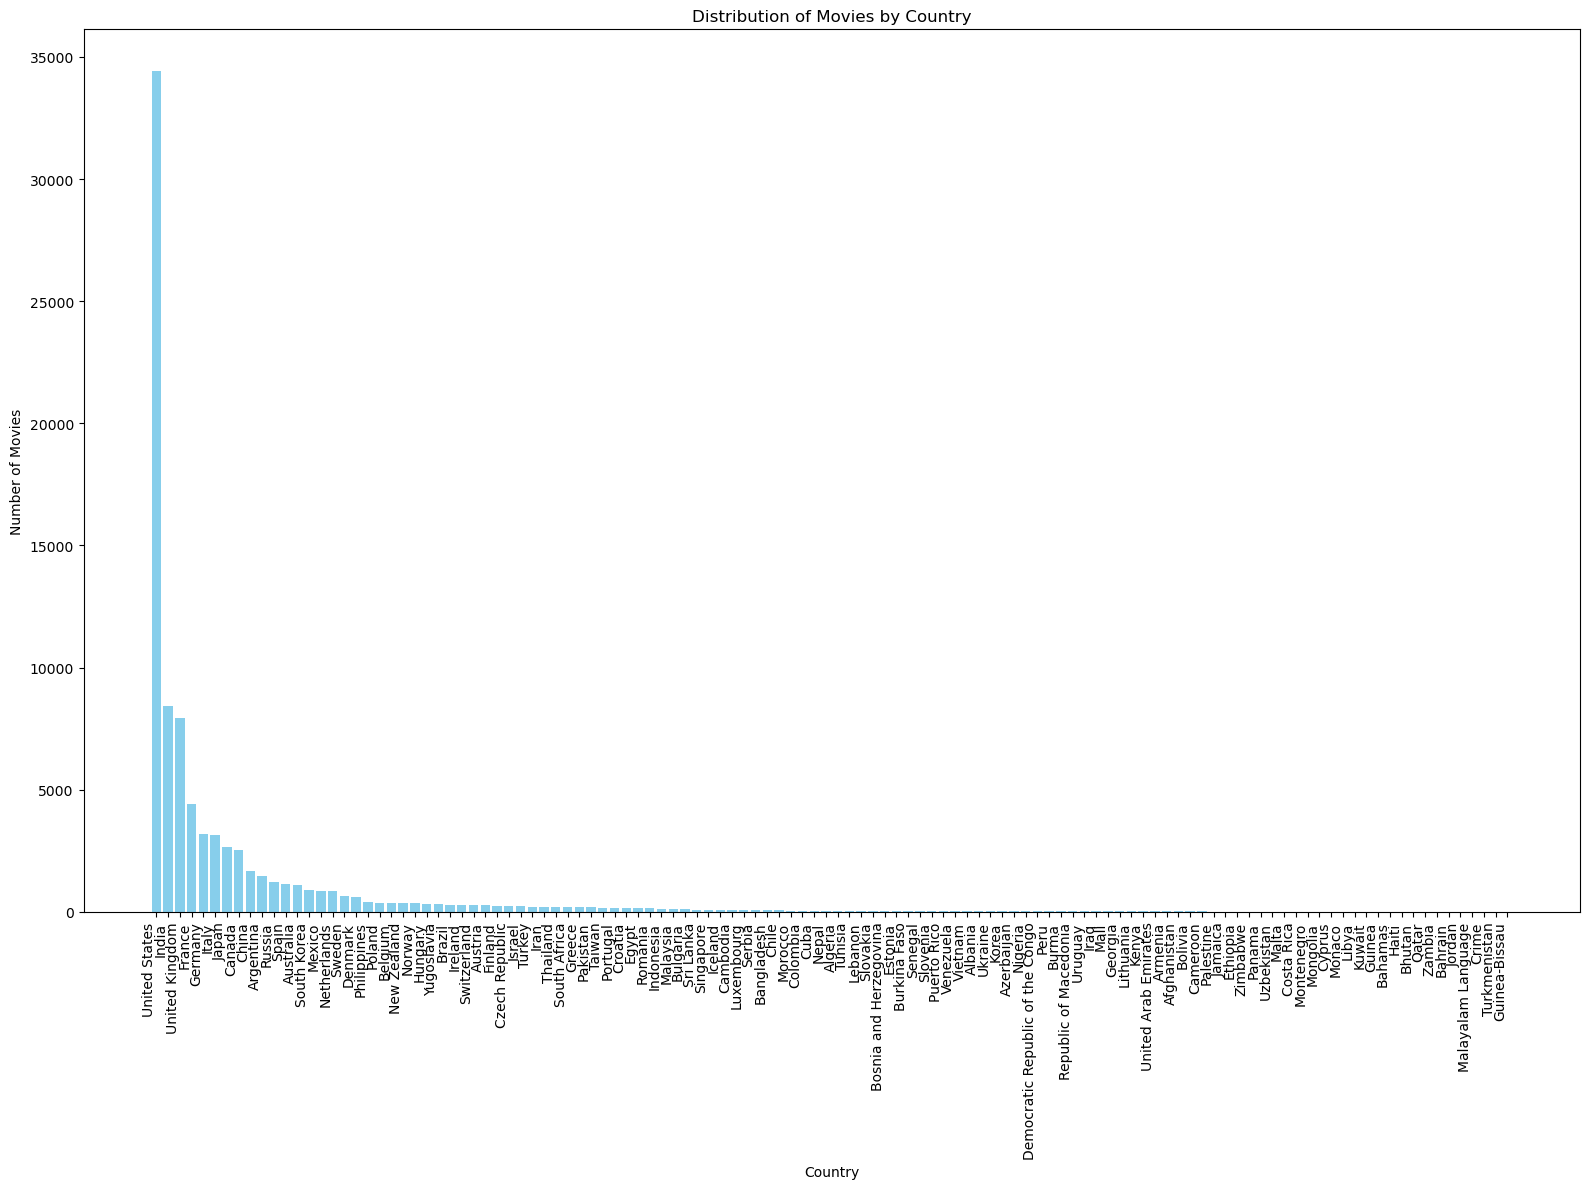

<Figure size 640x480 with 0 Axes>

In [422]:
country_df = pd.DataFrame(countries_counts.items(), columns=['Country', 'Count'])

# Sort by the genre count
country_df = country_df.sort_values(by='Count', ascending=False)

# Plot the distribution of genres
plt.figure(figsize=(16, 12))
plt.bar(country_df['Country'], country_df['Count'], color='skyblue')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.title('Distribution of Movies by Country')
plt.xticks(rotation=90, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()
plt.tight_layout()  # Adjust layout to prevent clipping

### 1.1.4. Box office revenue

!!!! IL EN MANQUE ENORMEMENT, GRAPH PAS REPRESENTATIF

PRENDRE NOUVEAU DATASET

In [81]:
def millions_formatter(x, pos):
    return f'{int(x / 1_000_000)}M'

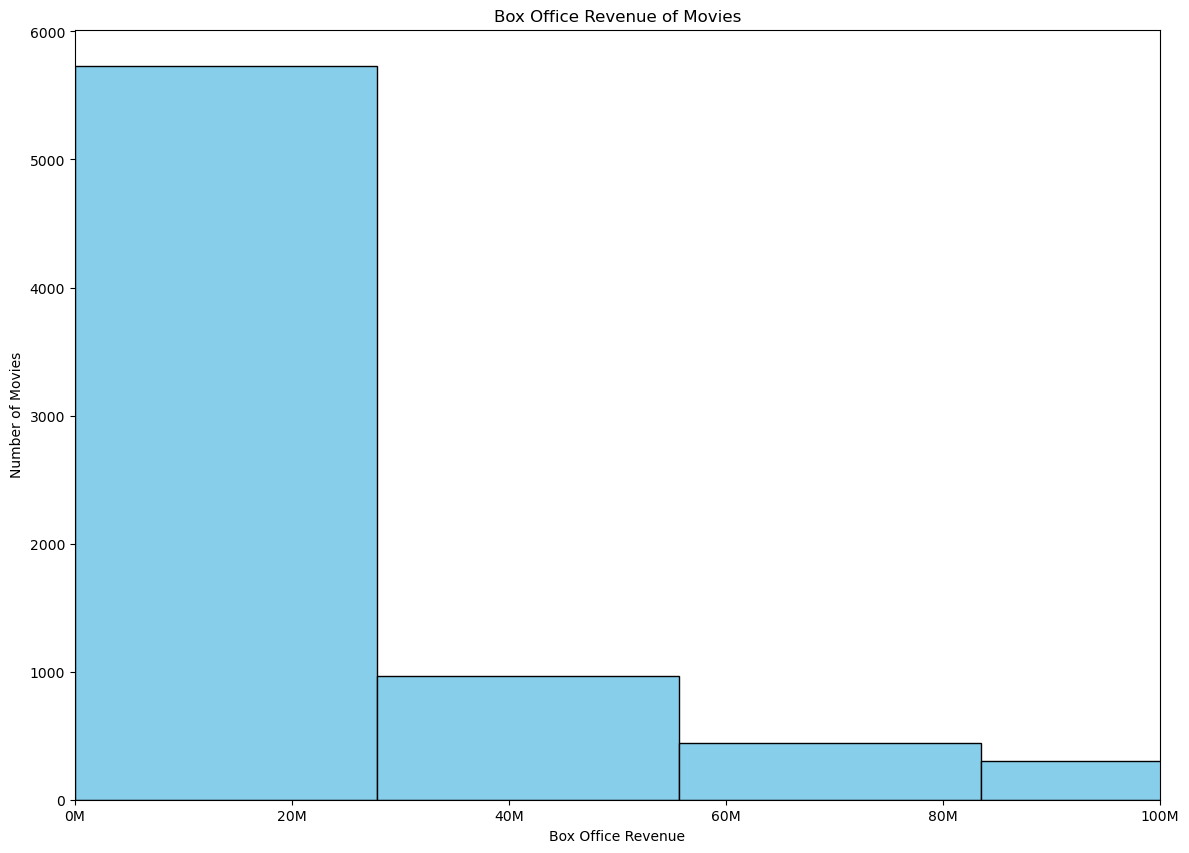

In [82]:
plt.figure(figsize=(14, 10))
plt.hist(movies_metadata['movie_box_office_revenue'].dropna(), bins=100, color='skyblue', edgecolor='black')
plt.xlabel('Box Office Revenue')
# add a limit to the x-axis to remove outliers
plt.xlim(0, 100_000_000)
# change the x_axis to Million notation e.g. for 100000000 i want 1M, for 200000000 i want 2M
plt.gca().xaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))
plt.ylabel('Number of Movies')
plt.title('Box Office Revenue of Movies')
plt.show()

### 1.1.5. Runtime

comment completer le runtime ? il en manque un quart. 

voir le  min et le max, réfléchir si possible de completer avec le mean ou le median, si distributions similaires

In [18]:
movies_metadata['movie_runtime'].describe()

count    6.129100e+04
mean     1.118192e+02
std      4.360070e+03
min      0.000000e+00
25%      8.100000e+01
50%      9.300000e+01
75%      1.060000e+02
max      1.079281e+06
Name: movie_runtime, dtype: float64

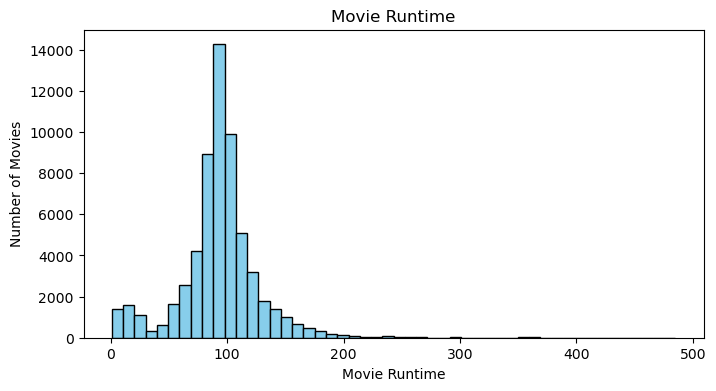

In [17]:
filtered_data = movies_metadata[(movies_metadata['movie_runtime'] > 1) & (movies_metadata['movie_runtime'] < 500)]

plt.figure(figsize=(8, 4))
plt.hist(filtered_data['movie_runtime'], bins=50, color='skyblue', edgecolor='black')
plt.xlabel('Movie Runtime')
plt.ylabel('Number of Movies')
plt.title('Movie Runtime')
plt.show()

### 1.1.6. Release date

should we convert the release date to datetime?
should we keep only the year?

regarder la range des années

regarder format=mixte

In [84]:

#print(movies_metadata['release_date'].head(10))
movies_metadata['release_date'] = pd.to_datetime(movies_metadata['movie_release_date'], errors='coerce')
#print(movies_metadata['release_date'].head(10))

!!!! ATTENTION CETTE CELL SUPRIME DES LIGNES DANS MOVIES METADATA

In [86]:
movies_metadata['movie_release_date'] = pd.to_datetime(movies_metadata['movie_release_date'], errors='coerce')

movies_metadata['movie_release_year'] = movies_metadata['movie_release_date'].dt.year

movies_metadata['movie_release_year'] = movies_metadata['movie_release_year'].fillna(
    movies_metadata['movie_release_date'].astype(str).str.extract(r'(\d{4})')[0].astype(float)
)
movies_metadata = movies_metadata.dropna(subset=['movie_release_year'])

movies_metadata['movie_release_year'] = movies_metadata['movie_release_year'].astype(int)

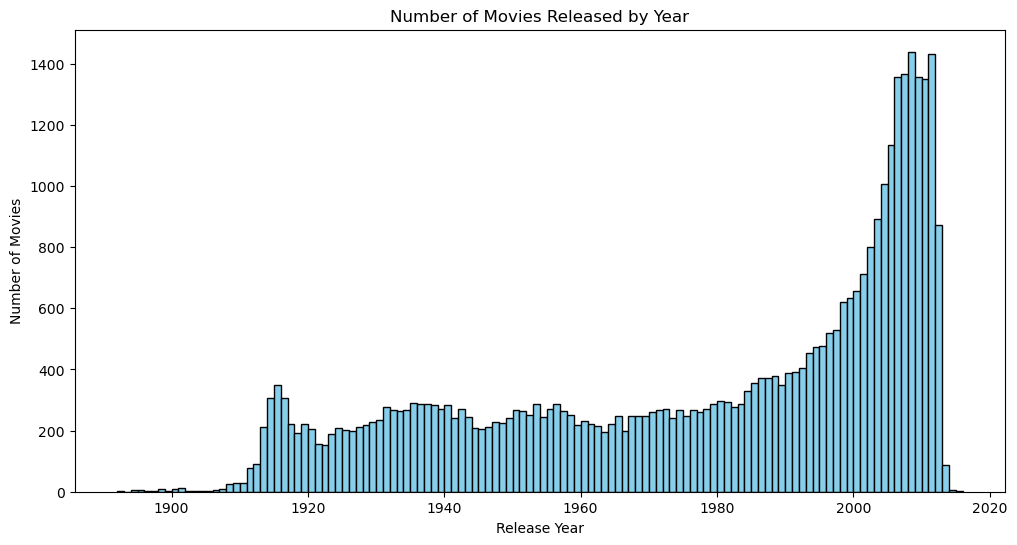

In [37]:
plt.figure(figsize=(12, 6))
plt.hist(movies_metadata['movie_release_year'], bins=range(movies_metadata['movie_release_year'].min(), movies_metadata['movie_release_year'].max() + 1), color='skyblue', edgecolor='black')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.title('Number of Movies Released by Year')
plt.show()

## 1.2. PLOT SUMMARIES

!!! A FAIRE

In [ ]:
data = []
with open(DATA_FOLDER_PATH+'plot_summaries.txt', 'r', encoding='utf-8') as file:
    for line in file:
        row = line.strip().split('\t')
        data.append(row)

plot_summaries = pd.DataFrame(data, columns=['Wikipedia_movie_id', 'plot_summary'])


# 2. CHARACTERS

## 2.1. METADATA

In [120]:
characters_metadata = pd.read_csv(DATA_FOLDER_PATH+'character.metadata.tsv', sep='\t', header=None, 
                 names=['wikipedia_movie_id', 'freebase_movie_id', 'movie_release_date', 'char_name',
                        'actor_date_of_birth', 'actor_gender', 'actor_height', 'actor_ethnicity', 'actor_name', 'actor_age', 
                        'char_actor_id', 'char_id', 'actor_id'])

In [40]:
characters_metadata.head()

,wikipedia_movie_id,freebase_movie_id,movie_release_date,char_name,date_of_birth,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age,char_actor_id,char_id,actor_id
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg


In [39]:
characters_metadata.isnull().sum()

wikipedia_movie_id         0
freebase_movie_id          0
movie_release_date      9995
char_name             257875
date_of_birth         106145
actor_gender           45609
actor_height          295845
actor_ethnicity       344611
actor_name              1228
actor_age             158113
char_actor_id              0
char_id               257865
actor_id                 815
dtype: int64

In [43]:
characters_metadata.shape

(450669, 13)

In [95]:
print(f"There is {characters_metadata['wikipedia_movie_id'].nunique()} movies in the characters metadata file.")
print(f"There is {movies_metadata['wikipedia_movie_id'].nunique()} movies in the movies metadata file.")

There is 64330 movies in the characters metadata file.
There is 81741 movies in the movies metadata file.


#### Handling duplicates

Some characters appear twice, we can delete them. They just have a different char id and actor/char id. We need to make sure we delete the right one.

In [97]:
characters_metadata[characters_metadata.duplicated(subset=["wikipedia_movie_id", "char_name", "actor_name"], keep=False)]

,wikipedia_movie_id,freebase_movie_id,movie_release_date,char_name,date_of_birth,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age,char_actor_id,char_id,actor_id
165,29528534,/m/04j0lfk,1986,Dr. Pramila,1955-10-17,F,NaN,/m/0cqgdq,Smita Patil,30.0,/m/04j0lfm,/m/0h4_vjt,/m/07hpqm
171,29528534,/m/04j0lfk,1986,Dr. Pramila,1955-10-17,F,NaN,/m/0cqgdq,Smita Patil,30.0,/m/0dwcl73,/m/0h4_vbv,/m/07hpqm
1342,25019575,/m/09k6mnp,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/m/0crv1ss,NaN,NaN
1343,25019575,/m/09k6mnp,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/m/0cf_d2h,NaN,NaN
1344,25019575,/m/09k6mnp,2001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/m/0cgp3_n,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
448593,7533970,/m/0kv9xq,1925,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/m/0gc1k8_,NaN,NaN
448825,28417976,/m/047n8hd,2002-12-11,Jay,1979-04-21,M,1.7,/m/03lmx1,James McAvoy,23.0,/m/0gd0zs1,/m/0gwsjpg,/m/06mnps
448829,28417976,/m/047n8hd,2002-12-11,Jay,1979-04-21,M,1.7,/m/03lmx1,James McAvoy,23.0,/m/04j2010,/m/0gwsjmf,/m/06mnps
450575,21772949,/m/05mspcd,1948-04,NaN,1913-12-25,M,NaN,/m/041rx,Tony Martin,NaN,/m/0bw_rvz,NaN,/m/02qh26


For now, we keep only one of the duplicates, but we'll need to look more into this.

In [ ]:
len_before = characters_metadata.shape[0]

450669

In [121]:
characters_metadata_no_duplicates = characters_metadata.drop_duplicates(subset=["wikipedia_movie_id", "char_name", "actor_name"]).reset_index(drop=True)
len_after = characters_metadata_no_duplicates.shape[0]

In [122]:
print(f"Number of duplicates removed: {len_before - len_after}")
print(f"Number of movies in the characters metadata file after removing duplicates: {characters_metadata_no_duplicates['wikipedia_movie_id'].nunique()}")

Number of duplicates removed: 1086
Number of movies in the characters metadata file after removing duplicates: 64330


No movies were deleted, same number before and after. But NaNs were removed on duplicated lines.

Now, we wonder how to get the gender when it is a NaN value. Using the actor name then linked to wikipedia? Other solution?

Thus, we check how many rows have Gender=NaN and actor name=NaN. We probably need to delete them.

In [123]:
characters_metadata_no_duplicates[characters_metadata_no_duplicates['actor_gender'].isna() & characters_metadata_no_duplicates['actor_name'].isna()].shape[0]

831

We can delete them later.

### 2.1.1. GENDER

And we check how many rows have Gender=NaN and actor_name != NaN. We can handle those rows and try to get the Gender from the Actor Name.

In [112]:
characters_metadata_no_duplicates[characters_metadata_no_duplicates['actor_gender'].isna() & characters_metadata_no_duplicates['actor_name'].notna()].shape[0]

44362

We use a dataset linking names to a specific gender.

In [426]:
name_gender = pd.read_csv("./src/data/name_gender_dataset.csv")
name_gender[name_gender["Name"] == "James"]
idx_max_prob = name_gender.groupby('Name')['Probability'].idxmax()
name_gender = name_gender.loc[idx_max_prob] 
name_gender[name_gender["Name"] == "James"]
name_gender = name_gender[["Name", "Gender"]]

In [427]:
def get_gender_from_name(name, name_gender_df):
    name_row = name_gender_df[name_gender_df['Name'] == name]
    
    if name_row.empty:
        return None
    else:
        return name_row['Gender'].values[0]

In [431]:
gender_nan_actor = characters_metadata_no_duplicates[characters_metadata_no_duplicates['actor_gender'].isna() & characters_metadata_no_duplicates['actor_name'].notna()]

for index, row in tqdm(gender_nan_actor.iterrows(), total=gender_nan_actor.shape[0], desc="Updating Gender", unit="row"):
    actor_name = row['actor_name']
    first_name = actor_name.split(" ")[0]
    gender = get_gender_from_name(first_name, name_gender)
    if gender is not None:
        characters_metadata_no_duplicates.at[index, 'Gender'] = gender

Updating Gender: 100%|██████████| 44362/44362 [04:27<00:00, 165.85row/s]


The rows that still don't have gender is because the names are not american.

In [434]:
characters_metadata_no_duplicates[characters_metadata_no_duplicates['actor_gender'].isna() & characters_metadata_no_duplicates['actor_name'].notna()]

,wikipedia_movie_id,freebase_movie_id,movie_release_date,char_name,actor_date_of_birth,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age,char_actor_id,char_id,actor_id,Gender
51,2238856,/m/06yc6v,2005-01,Sylvie's Dad,NaN,NaN,NaN,NaN,James Kayten,NaN,/m/0g98dw2,/m/0g98dw5,/m/0g98dwd,M
82,612710,/m/02wjqm,1999-10-01,NaN,NaN,NaN,NaN,NaN,Kimmy Suzuki,NaN,/m/0gdk_8c,NaN,/m/0gdk_8f,F
83,31983669,/m/0g4_n3m,1931-09-30,"Lelka, aka 'Merizhka'",NaN,NaN,NaN,NaN,Mariya Gonfa,NaN,/m/0g4_nf5,/m/0g4_ncn,/m/0g4_nck,F
84,31983669,/m/0g4_n3m,1931-09-30,Dandy' Mustapha,1909-03-17,NaN,NaN,NaN,Yvan Kyrlya,22.0,/m/0g4_ndf,/m/0g4_nbm,/m/05zqdwf,M
85,31983669,/m/0g4_n3m,1931-09-30,Nikolai 'Kolka' Rebrov,NaN,NaN,NaN,NaN,Mikhail Dzhagofarov,NaN,/m/0g4_ndk,/m/0g4_nbt,/m/0g4_nbq,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449561,12476867,/m/02w7zz8,2002,NaN,1982-01-28,NaN,NaN,NaN,Andrea Runge,19.0,/m/0gckh4f,NaN,/m/0gbx_rk,F
449563,12476867,/m/02w7zz8,2002,NaN,NaN,NaN,NaN,NaN,Ariel Bastian,NaN,/m/0gdkb51,NaN,/m/0gdkb55,F
449564,12476867,/m/02w7zz8,2002,NaN,NaN,NaN,NaN,NaN,Jared Van Snellenberg,NaN,/m/0gdndlw,NaN,/m/0gdmxzn,M
449581,28308153,/m/0cp05t9,1957,NaN,NaN,NaN,NaN,NaN,Roberta Paterson,NaN,/m/0g8ngmj,NaN,/m/0g8ngmm,F


There are still 6449 remaining. What do we do with them?

### 2.1.2. DATES

We need to handle the dates in this file : the movie release dates and the actor date of birth.

In [449]:
characters_metadata_date = characters_metadata_no_duplicates.copy(deep=True).reset_index(drop=True)
print(characters_metadata_date["movie_release_date"].isna().sum(), characters_metadata_date["actor_date_of_birth"].isna().sum())
characters_metadata_date = characters_metadata_date.dropna(subset=["movie_release_date", "actor_date_of_birth"]).reset_index(drop=True)
print(characters_metadata_date["movie_release_date"].isna().sum(), characters_metadata_date["actor_date_of_birth"].isna().sum())


9984 105651
0 0


In [443]:
characters_metadata_date.shape

(334830, 14)

In [444]:
characters_metadata_no_duplicates.shape

(449583, 14)

In [450]:
characters_metadata_date = characters_metadata_date[
    (characters_metadata_date['movie_release_date'] > '1850-01-01') & 
    (characters_metadata_date['movie_release_date'] < '2025-01-01')
]
characters_metadata_date = characters_metadata_date[
    (characters_metadata_date['actor_date_of_birth'] > '1850-01-01') & 
    (characters_metadata_date['actor_date_of_birth'] < '2025-01-01')
]

In [451]:
# using mixed because some dates are only year and some y-m-d
characters_metadata_date["movie_release_date"] = pd.to_datetime(characters_metadata_date["movie_release_date"], format="mixed")
# adding utc to make the dt.year work after
characters_metadata_date["actor_date_of_birth"] = pd.to_datetime(characters_metadata_date["actor_date_of_birth"], format="mixed", utc=True)

In [452]:
characters_metadata_date["movie_release_year"] = characters_metadata_date["movie_release_date"].dt.year
characters_metadata_date["actor_birth_year"] = characters_metadata_date["actor_date_of_birth"].dt.year
characters_metadata_date["actor_age_bis"] = characters_metadata_date["movie_release_year"] - characters_metadata_date["actor_birth_year"]

In [453]:
characters_metadata_date.head()


,wikipedia_movie_id,freebase_movie_id,movie_release_date,char_name,actor_date_of_birth,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age,char_actor_id,char_id,actor_id,Gender,movie_release_year,actor_birth_year,actor_age_bis
0,975900,/m/03vyhn,2001-08-24,Akooshay,1958-08-26 00:00:00+00:00,F,1.620,NaN,Wanda De Jesus,42.0,/m/0bgchxw,/m/0bgcj3x,/m/03wcfv7,NaN,2001,1958,43
1,975900,/m/03vyhn,2001-08-24,Lieutenant Melanie Ballard,1974-08-15 00:00:00+00:00,F,1.780,/m/044038p,Natasha Henstridge,27.0,/m/0jys3m,/m/0bgchn4,/m/0346l4,NaN,2001,1974,27
2,975900,/m/03vyhn,2001-08-24,Desolation Williams,1969-06-15 00:00:00+00:00,M,1.727,/m/0x67,Ice Cube,32.0,/m/0jys3g,/m/0bgchn_,/m/01vw26l,NaN,2001,1969,32
3,975900,/m/03vyhn,2001-08-24,Sgt Jericho Butler,1967-09-12 00:00:00+00:00,M,1.750,NaN,Jason Statham,33.0,/m/02vchl6,/m/0bgchnq,/m/034hyc,NaN,2001,1967,34
4,975900,/m/03vyhn,2001-08-24,Bashira Kincaid,1977-09-25 00:00:00+00:00,F,1.650,NaN,Clea DuVall,23.0,/m/02vbb3r,/m/0bgchp9,/m/01y9xg,NaN,2001,1977,24


TO CHECK: if new age and release year match old columns


### 2.1.3. Distributions of characters per movie

In [136]:
char_per_movie = characters_metadata_no_duplicates.groupby("wikipedia_movie_id")['char_name'].count().reset_index()

In [137]:
max_characters = char_per_movie['char_name'].max()
max_movie_id = char_per_movie[char_per_movie['char_name'] == max_characters]['wikipedia_movie_id'].values[0]
characters_metadata_no_duplicates[characters_metadata_no_duplicates["wikipedia_movie_id"]==max_movie_id].head()

,wikipedia_movie_id,freebase_movie_id,movie_release_date,char_name,actor_date_of_birth,actor_gender,actor_height,actor_ethnicity,actor_name,actor_age,char_actor_id,char_id,actor_id
355042,27872371,/m/0cc8620,2012-05-25,Drunk American Soldier,1975-12-19,M,1.780,NaN,Brian Vowell,36.0,/m/0jwd831,/m/0jwbdj8,/m/0h0_4_n
355043,27872371,/m/0cc8620,2012-05-25,Martha Gellhorn,1967-06-20,F,1.791,/m/03bkbh,Nicole Kidman,44.0,/m/0cpk2h_,/m/0gx9j37,/m/05dbf
355044,27872371,/m/0cc8620,2012-05-25,Ernest Hemingway,1964-10-03,M,1.890,/m/02w7gg,Clive Owen,47.0,/m/0cpk730,/m/0k3q90x,/m/03v3xp
355045,27872371,/m/0cc8620,2012-05-25,Russian general,1931-01-05,M,1.740,NaN,Robert Duvall,81.0,/m/0h2j5xp,/m/0h2j5xs,/m/015c4g
355046,27872371,/m/0cc8620,2012-05-25,Tall blonde woman,1965-07-03,F,1.780,/m/0dqqwy,Connie Nielsen,46.0,/m/0h2bv_g,/m/0h2bv_j,/m/04wn3k


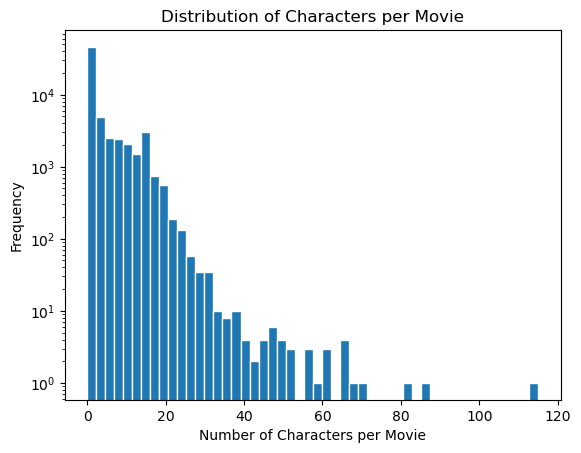

In [139]:
# Plot the histogram of character counts per movie
plt.hist(char_per_movie['char_name'], bins=50, log=True, edgecolor="white")  # specify bins if needed
plt.xlabel('Number of Characters per Movie')
plt.ylabel('Frequency')
plt.title('Distribution of Characters per Movie')
plt.show()

link to runtime, can be really interesting

### 2.1.4. Distribution of movies along years

In [455]:
release_years = characters_metadata_date.drop_duplicates("wikipedia_movie_id")
release_years = release_years.groupby("movie_release_year")["wikipedia_movie_id"].count()
release_years

movie_release_year
1891      1
1893      1
1894      4
1896      3
1897      1
       ... 
2012    925
2013    131
2014     10
2015      3
2016      1
Name: wikipedia_movie_id, Length: 124, dtype: int64

Text(0, 0.5, 'Number of movies')

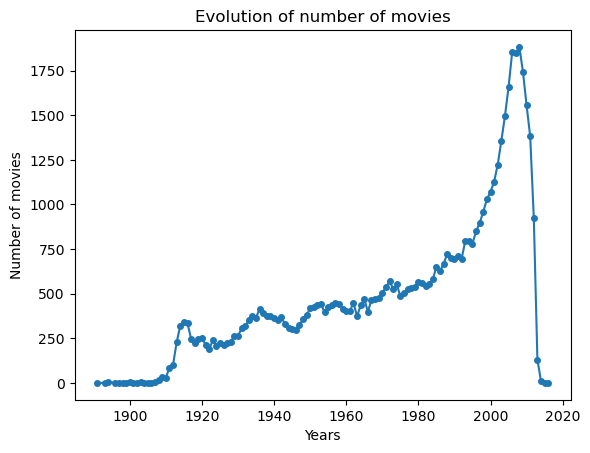

In [456]:
plt.plot(release_years, "-o", markersize=4)
plt.title("Evolution of number of movies")
plt.xlabel("Years")
plt.ylabel("Number of movies")

In [458]:
release_years_df = release_years.reset_index()
worldwarII = release_years_df[(release_years_df["movie_release_year"] >= 1939) & (release_years_df["movie_release_year"] <= 1945)]
koreanwar = release_years_df[(release_years_df["movie_release_year"] >= 1950) & (release_years_df["movie_release_year"] <= 1953)]
vietnamwar = release_years_df[(release_years_df["movie_release_year"] >= 1959) & (release_years_df["movie_release_year"] <= 1975)]
gulfwar = release_years_df[(release_years_df["movie_release_year"] >= 1990) & (release_years_df["movie_release_year"] <= 1991)]
worldwarI = release_years_df[(release_years_df["movie_release_year"] >= 1914) & (release_years_df["movie_release_year"] <= 1918)]

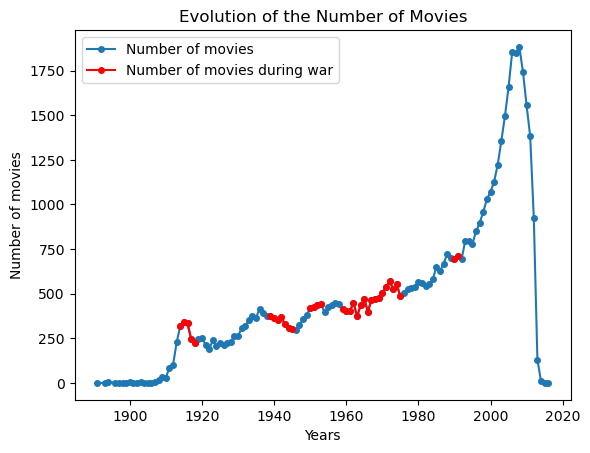

In [460]:
fig, ax = plt.subplots()
ax.plot(release_years_df["movie_release_year"], release_years_df["wikipedia_movie_id"], "-o", label="Number of movies", markersize=4)

ax.plot(worldwarII["movie_release_year"], worldwarII["wikipedia_movie_id"], "-o", label="Number of movies during war", color="red", markersize=4)
ax.plot(koreanwar["movie_release_year"], koreanwar["wikipedia_movie_id"], "-o", color="red", markersize=4)
ax.plot(vietnamwar["movie_release_year"], vietnamwar["wikipedia_movie_id"], "-o", color="red", markersize=4)
ax.plot(gulfwar["movie_release_year"], gulfwar["wikipedia_movie_id"], "-o", color="red", markersize=4)
ax.plot(worldwarI["movie_release_year"], worldwarI["wikipedia_movie_id"], "-o", color="red", markersize=4)


ax.set_title("Evolution of the Number of Movies")
ax.set_xlabel("Years")
ax.set_ylabel("Number of movies")
ax.legend()

### 2.1.5. Distribution of female and mal characters

In [462]:
characters_gender = characters_metadata_date[
    characters_metadata_date["actor_gender"].isin(["F", "M"])
]

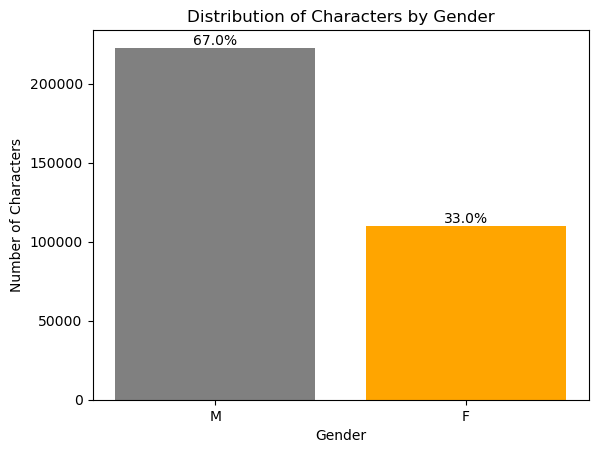

In [463]:
gender_counts = characters_gender["actor_gender"].value_counts()

total_characters = gender_counts.sum()
percentages = (gender_counts / total_characters) * 100

# Plot the bar chart
plt.bar(gender_counts.index, gender_counts.values, color=['grey', 'orange'])
plt.xlabel('Gender')
plt.ylabel('Number of Characters')
plt.title('Distribution of Characters by Gender')

for index, (count, percentage) in enumerate(zip(gender_counts.values, percentages)):
    plt.text(index, count, f'{percentage:.1f}%', ha='center', va='bottom')


In [ ]:
# characters_gender_time = characters_metadata_date.dropna(subset=["movie_release_year", "actor_gender"])
# characters_gender_time.loc["actor_gender"] = characters_gender_time["actor_gender"].apply(lambda x: 0 if x=="M" else 1)

/var/folders/pm/cnh4098x5cv02sy4zwlhygtc0000gn/T/ipykernel_3363/3412841352.py:2: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  characters_gender_time.loc["actor_gender"] = characters_gender_time["actor_gender"].apply(lambda x: 0 if x=="M" else 1)
/var/folders/pm/cnh4098x5cv02sy4zwlhygtc0000gn/T/ipykernel_3363/3412841352.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  characters_gender_time.loc["actor_gender"] = characters_gender_time["actor_gender"].apply(lambda x: 0 if x=="M" else 1)


Let's groupby on release_years_df to get also the number of movies

In [ ]:
# characters_gender_time = characters_gender_time.groupby("movie_release_year")["actor_gender"].value_counts().unstack(fill_value=0)
# characters_gender_time = characters_gender_time.reset_index()
# characters_gender_time["Num_movies"] = release_years_df["wikipedia_movie_id"]

KeyError: 'Column not found: actor_gender'

In [ ]:
# plt.bar(characters_gender_time["Release_year"], characters_gender_time[1], label="Number of female characters", color="orange")
# plt.legend()

In [ ]:
# plt.bar(characters_gender_time["Release_year"], characters_gender_time[0], label="Number of male characters", color="grey")
# plt.legend()

In [ ]:
# fig, ax = plt.subplots()
# width = 0.8
# ax.bar(characters_gender_time.index, characters_gender_time[0], width, label="Male", color="grey")
# ax.bar(characters_gender_time.index, characters_gender_time[1], width, bottom=characters_gender_time[0], label="Female", color="orange")
# ax.set_title("Evolution of number of Female and Male characters")
# ax.legend()
# ax.set_xlabel("Years")
# ax.set_ylabel("Number of characters")

### 2.1.6. Proportion of female characters

### 2.1.7. Distribution of the actor's ages

### 2.1.8. Distribution of the actor's heights

à réfléchir

## 2.2. CHARACTER TYPES

In [423]:
tvtropes_data = pd.read_csv(DATA_FOLDER_PATH+'tvtropes.clusters.txt', sep='\t', header=None, 
                             names=['character_type', 'metadata'])


In [424]:
character_types = tvtropes_data['character_type'].unique()

In [425]:
tvtropes_data['metadata'] = tvtropes_data['metadata'].apply(ast.literal_eval)
tvtropes_data = pd.concat([tvtropes_data.drop(['metadata'], axis=1), tvtropes_data['metadata'].apply(pd.Series)], axis=1)
tvtropes_data = tvtropes_data.rename(columns={'char': 'char_name', 'actor': 'actor_name', 'movie': 'movie_name', 'id': 'char_actor_id'})
tvtropes_data.head(10)

,character_type,char_name,movie_name,char_actor_id,actor_name
0,absent_minded_professor,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams
1,absent_minded_professor,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen
3,absent_minded_professor,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn
4,absent_minded_professor,Daniel Jackson,Stargate,/m/0k3rhh,James Spader
5,adventurer_archaeologist,Indiana Jones,Indiana Jones and the Kingdom of the Crystal S...,/m/0jzx78,Harrison Ford
6,adventurer_archaeologist,Indiana Jones,Indiana Jones and the Raiders of the Lost Ark,/m/0k294p,Harrison Ford
7,adventurer_archaeologist,Indiana Jones,Indiana Jones and the Temple of Doom,/m/0jzx9b,Harrison Ford
8,adventurer_archaeologist,Evelyn Carnahan-O'Connell,The Mummy,/m/0k5yzc,Rachel Weisz
9,arrogant_kungfu_guy,Han,Enter the Dragon,/m/02vd8hn,Shih Kien


In [160]:
tvtropes_data_characted_type = tvtropes_data.groupby('character_type').size().reset_index(name='counts')

tvtropes_data_characted_type.head(10)

,character_type,counts
0,absent_minded_professor,5
1,adventurer_archaeologist,4
2,arrogant_kungfu_guy,9
3,big_man_on_campus,7
4,bounty_hunter,10
5,brainless_beauty,12
6,broken_bird,5
7,bromantic_foil,5
8,bruiser_with_a_soft_center,3
9,bully,3


In [147]:
tvtropes_data_characted_type.shape

(72, 2)

In [162]:
tvtropes_data['actor_gender'] = tvtropes_data['actor_name'].map(characters_metadata.set_index('actor_name')['actor_gender'].to_dict())
tvtropes_data


,character_type,char_name,movie_name,char_actor_id,actor_name,actor_gender
0,absent_minded_professor,Professor Philip Brainard,Flubber,/m/0jy9q0,Robin Williams,M
1,absent_minded_professor,Professor Keenbean,Richie Rich,/m/02vchl3,Michael McShane,M
2,absent_minded_professor,Dr. Reinhardt Lane,The Shadow,/m/0k6fkc,Ian McKellen,M
3,absent_minded_professor,Dr. Harold Medford,Them!,/m/0k6_br,Edmund Gwenn,M
4,absent_minded_professor,Daniel Jackson,Stargate,/m/0k3rhh,James Spader,M
...,...,...,...,...,...,...
496,young_gun,Morgan Earp,Tombstone,/m/0k776f,Bill Paxton,M
497,young_gun,Colorado Ryan,Rio Bravo,/m/0k2kqg,Ricky Nelson,M
498,young_gun,Tom Sawyer,The League of Extraordinary Gentlemen,/m/0k5nsh,Shane West,M
499,young_gun,William H. 'Billy the Kid' Bonney,Young Guns II,/m/03lrjk0,Emilio Estevez,M


In [163]:
tvtropes_data_gender = tvtropes_data.groupby('actor_gender').size().reset_index(name='counts')
tvtropes_data_gender

,actor_gender,counts
0,F,69
1,M,431


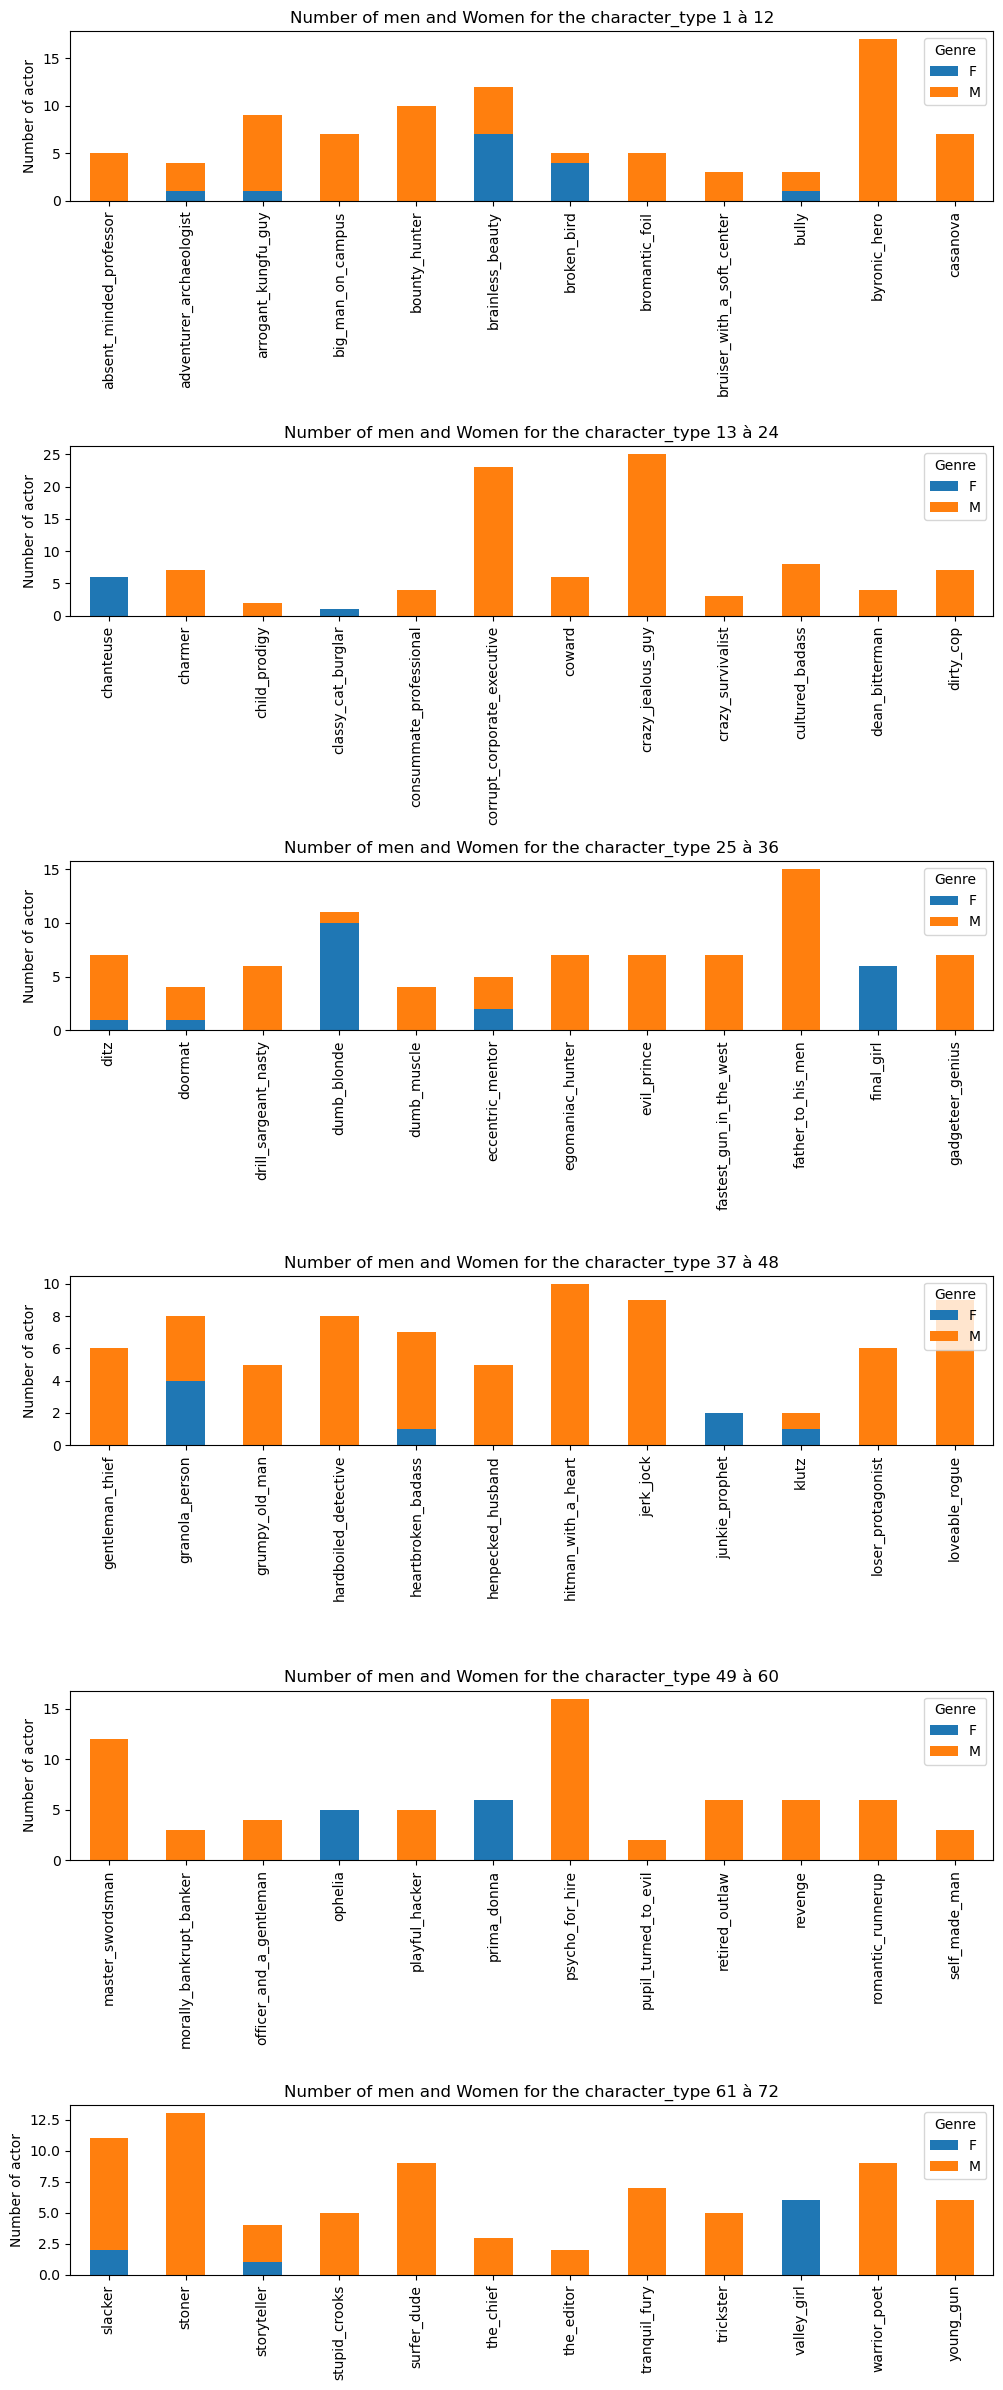

In [164]:
character_type_gender_counts = tvtropes_data.groupby(['character_type', 'actor_gender']).size().unstack(fill_value=0)
categories_per_subplot = 12
num_subplots = (len(character_type_gender_counts) + categories_per_subplot - 1) // categories_per_subplot

fig, axes = plt.subplots(num_subplots, 1, figsize=(10, 4 * num_subplots))


for i in range(num_subplots):
    start = i * categories_per_subplot
    end = start + categories_per_subplot
    subset = character_type_gender_counts.iloc[start:end]

    subset.plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(f"Number of men and Women for the character_type {start + 1} à {end}")
    axes[i].set_xlabel("") # Character type
    axes[i].set_ylabel("Number of actor")
    axes[i].legend(title="Genre")

plt.tight_layout()
plt.show()

In [172]:
tvtropes_data_actor = tvtropes_data.groupby('actor_name').size().reset_index(name='counts').sort_values(by='counts', ascending=False)
tvtropes_data_actor

,actor_name,counts
279,Robert De Niro,9
109,Harrison Ford,8
166,Johnny Depp,8
57,Clint Eastwood,7
64,Daniel Craig,5
...,...,...
148,Jeremy Jordan,1
147,Jeremy Irons,1
146,Jeremy Davies,1
145,Jeffrey Tambor,1


In [175]:
tvtropes_data[tvtropes_data['actor_name'] == 'Robert De Niro']

,character_type,char_name,movie_name,char_actor_id,actor_name,actor_gender
31,bounty_hunter,Jack Walsh,Midnight Run,/m/0k0n9r,Robert De Niro,M
63,byronic_hero,Jake LaMotta,Raging Bull,/m/0k28_g,Robert De Niro,M
65,byronic_hero,Travis Bickle,Taxi Driver,/m/0k43s9,Robert De Niro,M
106,consummate_professional,Sam 'Ace' Rothstein,Casino,/m/0jw4vx,Robert De Niro,M
136,crazy_jealous_guy,Jake LaMotta,Raging Bull,/m/0k28_g,Robert De Niro,M
147,crazy_jealous_guy,Sam 'Ace' Rothstein,Casino,/m/0jw4vx,Robert De Niro,M
272,gentleman_thief,Neil McCauley,Heat,/m/0jz8sq,Robert De Niro,M
275,gentleman_thief,Nick Wells,The Score,/m/0k6d1f,Robert De Niro,M
473,tranquil_fury,Max Cady,Cape Fear,/m/0jw22y,Robert De Niro,M


## 2.3. CHARACTER NAMES 

In [20]:
names = pd.read_csv(DATA_FOLDER_PATH+'name.clusters.txt', sep='\t', header=None, 
                    names=['Cluster_name', 'Char_actor_id'])
print(names.info())
#i want to see all of the different and unique cluster names that exist
print(names['Cluster_name'].unique())
print(len(names['Cluster_name'].unique()))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Cluster_name   2666 non-null   object
 1   Char_actor_id  2666 non-null   object
dtypes: object(2)
memory usage: 41.8+ KB
None
['Stuart Little' 'John Doe' 'Josh Framm' 'Caspian X' 'Apostle Peter'
 'Van Wilder' 'Max Cady' 'The Emperor of China' 'Ludo Dekker'
 'Veer Pratap Singh' 'John McClane' 'Jack Cates' 'Shorty Meeks'
 'Fievel Mousekewitz' 'Kazuya Mishima' 'Darth Vader' 'Queen Victoria'
 'Billy Fish' 'Ian Hawke' 'Ginger Fitzgerald' 'Le Chiffre' 'The Professor'
 'Jim Levenstein' 'Dave Robicheaux' "Jimmy 'The Tulip' Tudeski"
 'Pavel Chekov' 'Chow Mo-wan' 'Foghorn Leghorn' 'Walter Hill'
 'Dylan Sanders' 'The Girl' 'Sherlock Holmes' 'Emperor Nero'
 'Sonia Saxena' 'David King' 'Mr. Big' 'The Drifter' 'Molly O'
 'Judas Iscariot' 'Gloria Sullivan' 'Jennifer Parker' 'Roger Murtaugh'
 'Sharpay Evans